In [1]:
# Step 1: import librires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [7]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
# Basic Data Checks EDA PROCESS

In [9]:
df.shape

(1338, 7)

In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [11]:
df.duplicated().sum()

np.int64(1)

In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [13]:
df=df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [15]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


In [16]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [17]:
# Univariate Analysis(each column Separatley)
# Numerical Features: histograms+boxplots

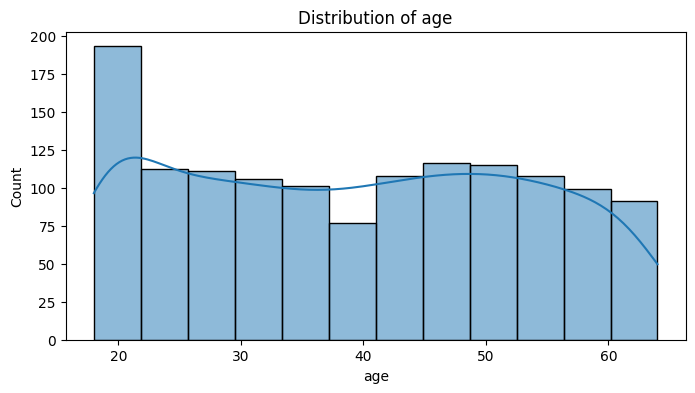

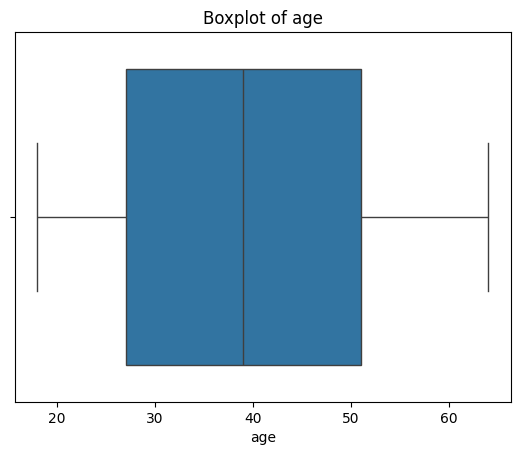

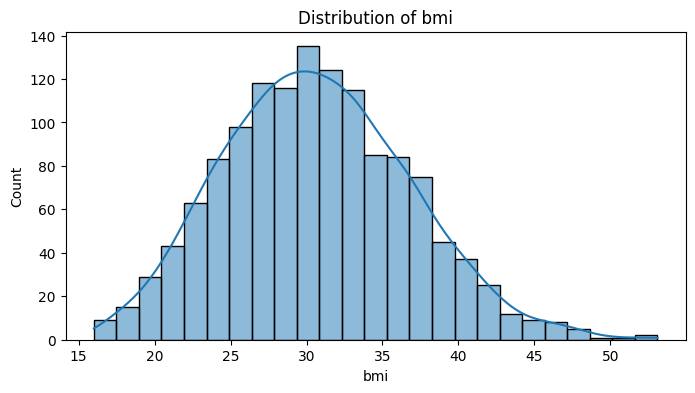

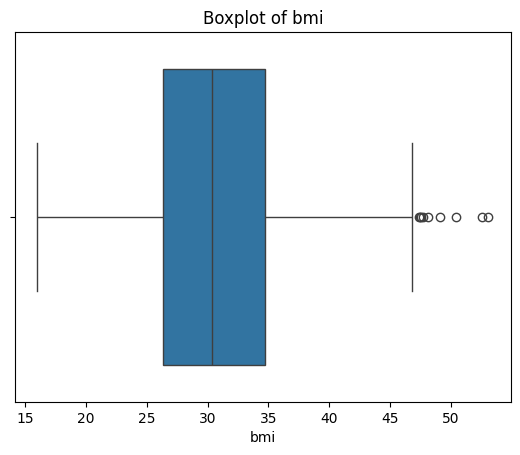

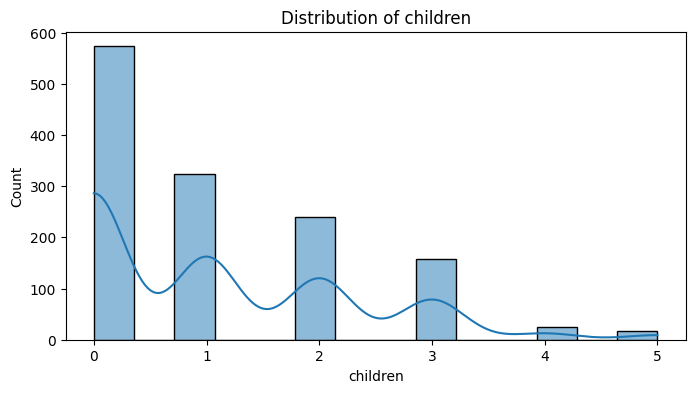

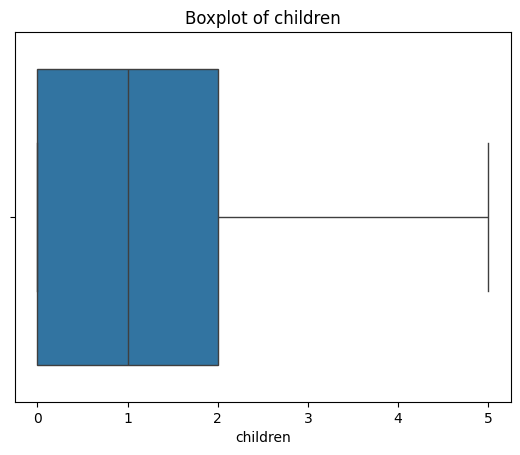

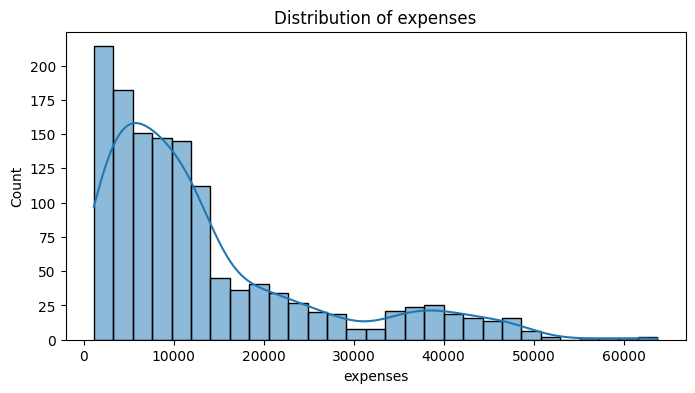

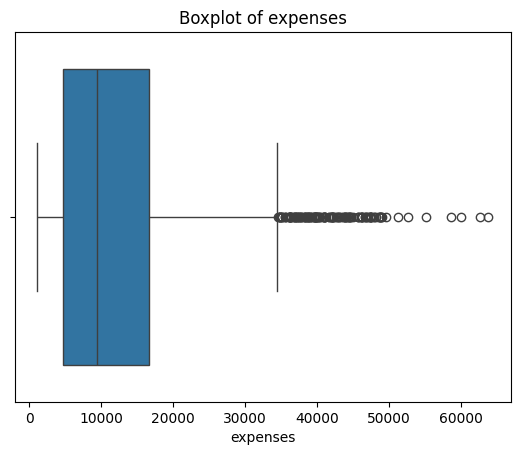

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'bmi', 'children', 'expenses']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [19]:
 # Categorical features:Countplots

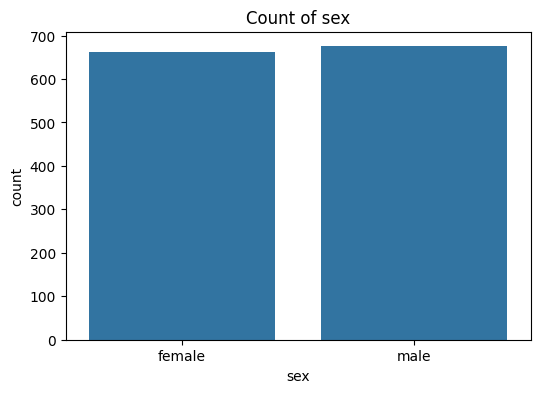

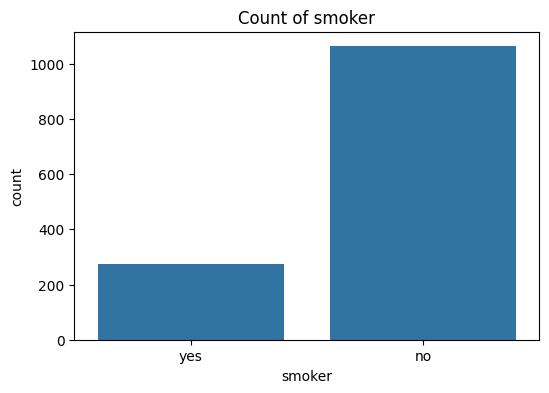

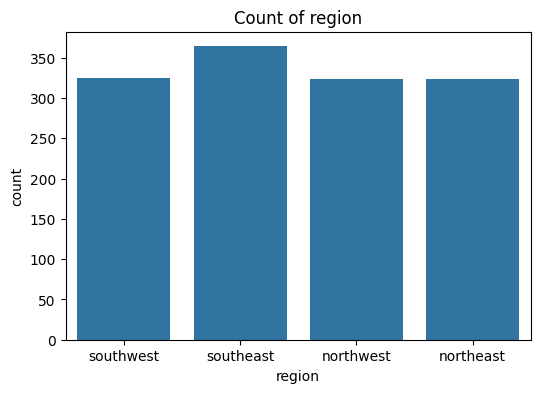

In [20]:
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()

In [21]:
# Bivariate Analysis (Features vs Target)--->Expenses

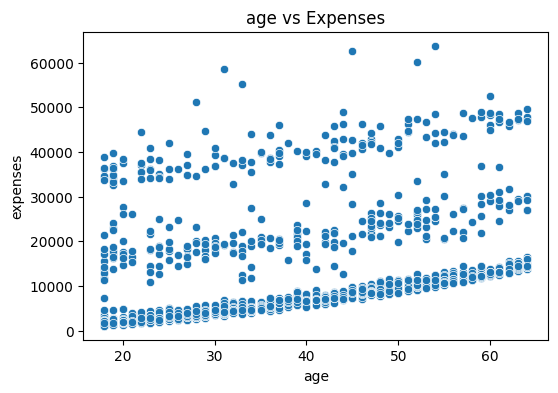

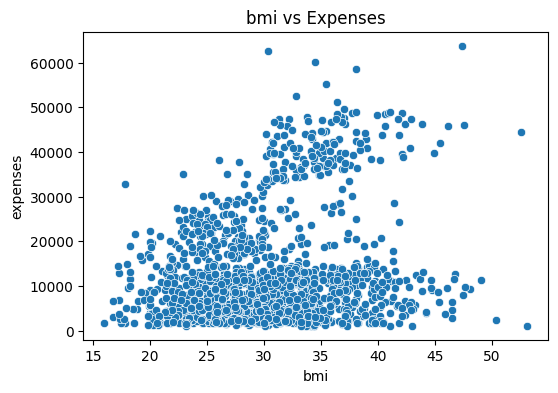

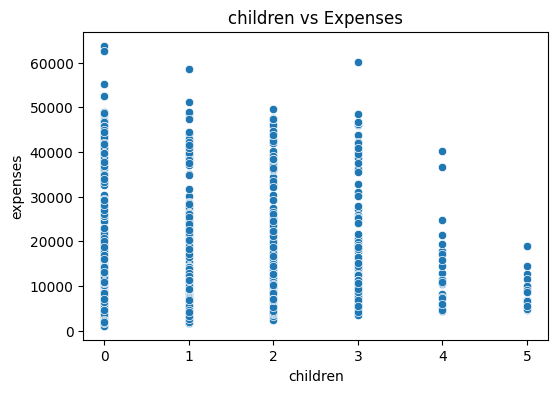

In [22]:
# Numerical vs Target
for col in ['age', 'bmi', 'children']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['expenses'])
    plt.title(f"{col} vs Expenses")
    plt.show()

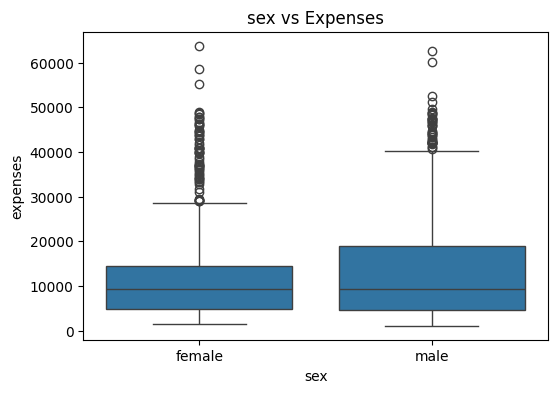

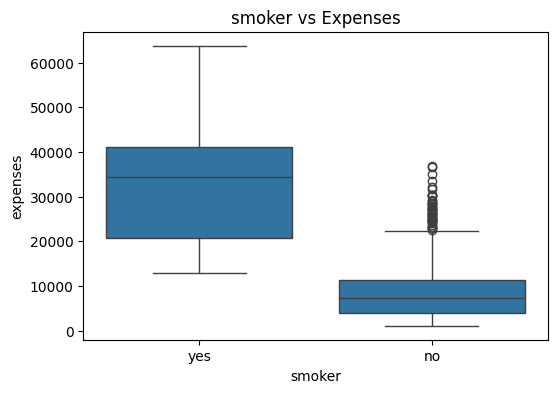

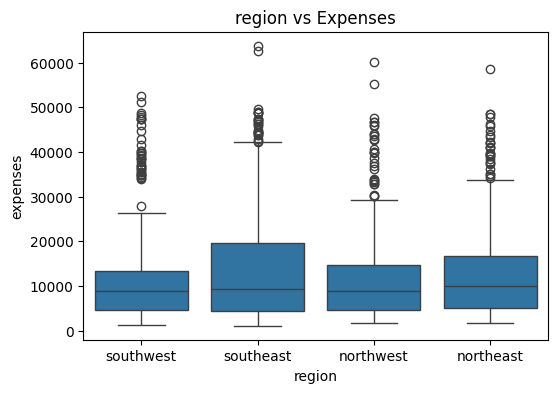

In [23]:
# Categorical vs Target
for col in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['expenses'])
    plt.title(f"{col} vs Expenses")
    plt.show()

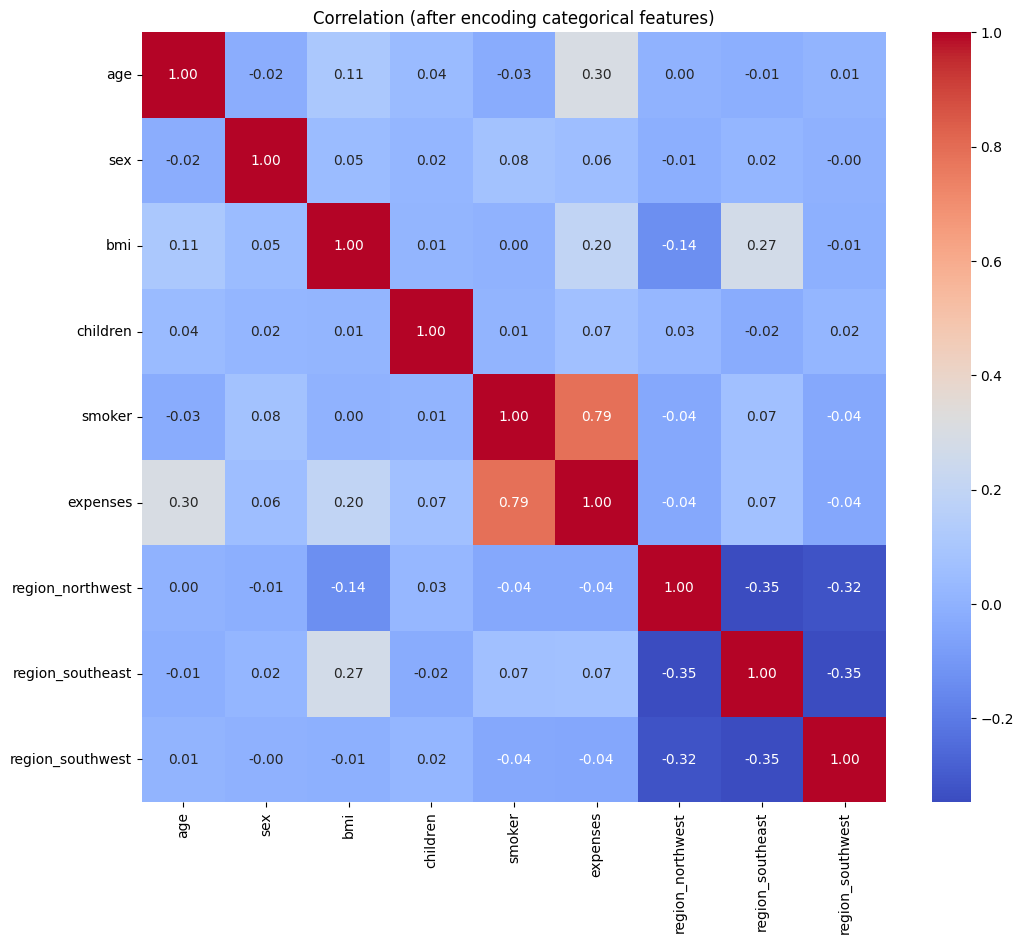

In [24]:
df_enc = df.copy()
df_enc['sex'] = df_enc['sex'].map({'female':0, 'male':1})        # adjust mapping if needed
df_enc['smoker'] = df_enc['smoker'].map({'no':0, 'yes':1})       # adjust mapping if needed

# one-hot encode region (creates region_southeast, etc.)
df_enc = pd.get_dummies(df_enc, columns=['region'], drop_first=True)

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_enc.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation (after encoding categorical features)")
plt.show()

In [25]:
corr_series = df_enc.corr()['expenses'].sort_values(ascending=False)
print(corr_series) # I have printed Expenses in Ascending Order

expenses            1.000000
smoker              0.787234
age                 0.298308
bmi                 0.198637
region_southeast    0.073578
children            0.067389
sex                 0.058045
region_northwest   -0.038695
region_southwest   -0.043637
Name: expenses, dtype: float64


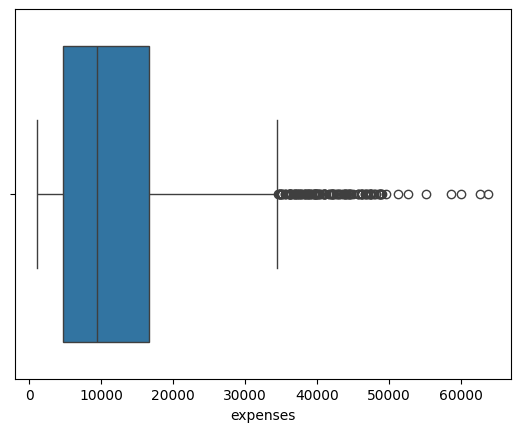

In [26]:
 # Outlier Detection
sns.boxplot(x=df['expenses'])
plt.show()

 # EDA PROCESS SUMMARY
The dataset has 1338 records with 7 features and no missing values.
Expenses are highly skewed with a few very large outliers.
Smoker status shows the strongest impact on expenses, with smokers paying much higher costs.
Age and BMI also influence expenses, where older individuals and those with higher BMI tend to spend more.
Children, sex, and region have very little effect on expenses.
Overall, smoker, age, and BMI emerge as the key predictors for medical cost prediction.

Shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Numerical columns: ['age', 'bmi', 'children']
Categorical columns: ['sex', 'smoker', 'region']

Summary statistics:
                age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.665471     1.094918
std      14.049960     6.098382     1.205493
min      18.000000    16.000000     0.000000
25%      27.000000    26.300000     0.000000
50%      39.000000    30.400000     1.000000
75%      51.000000    34.700000     2.000000
max      64.000000    53.100000     5.000000


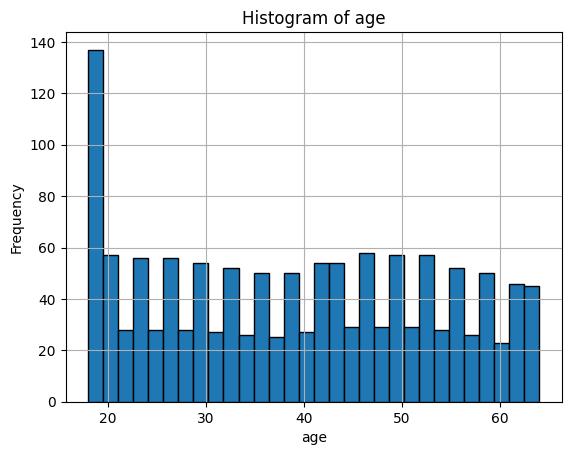

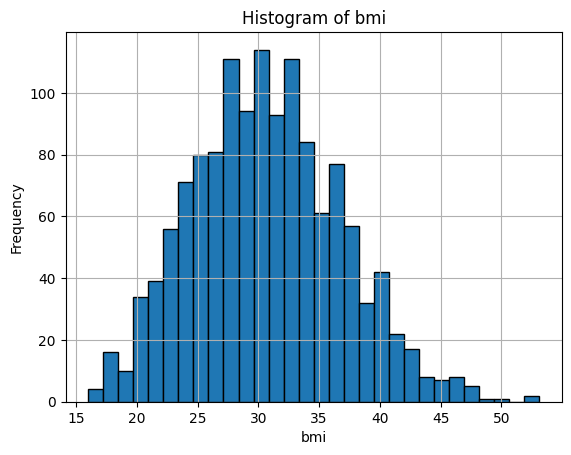

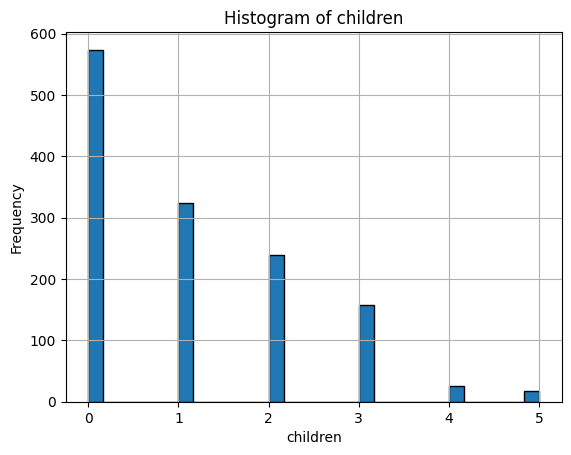

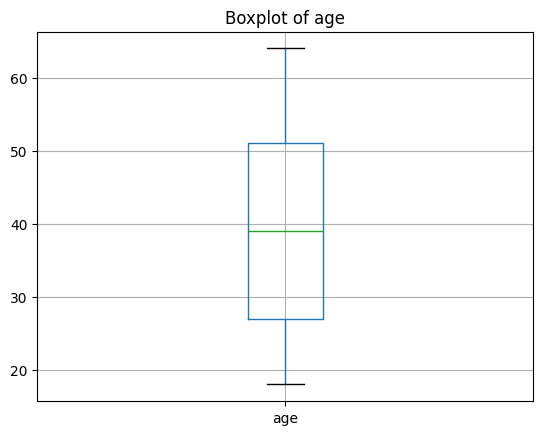

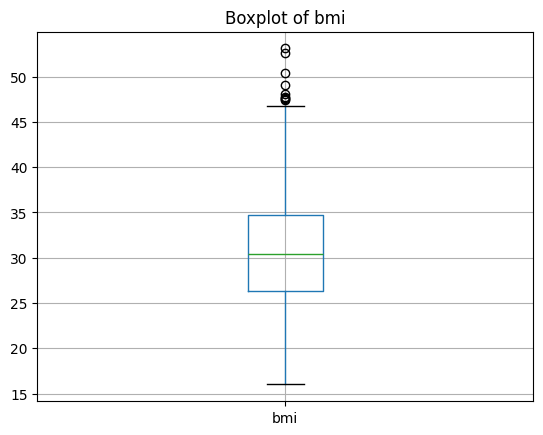

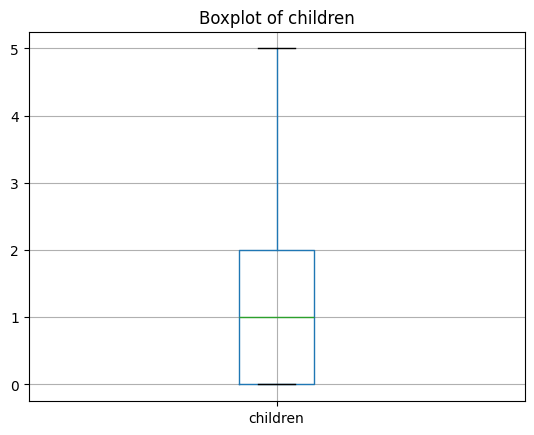

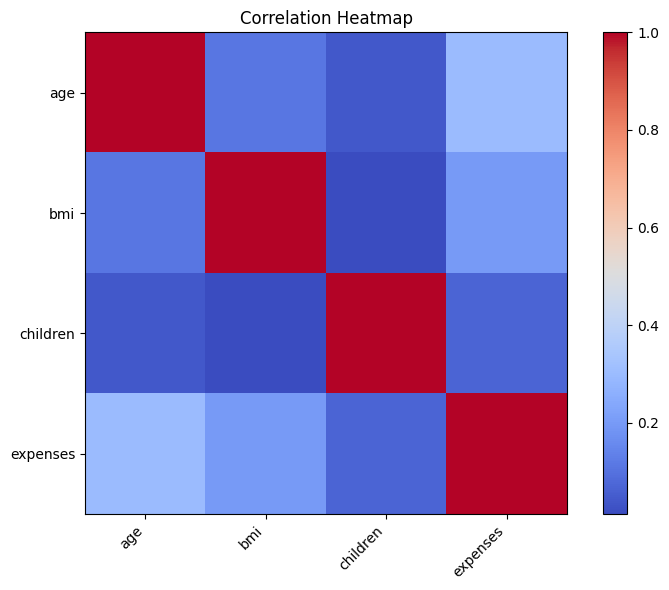


Preprocessing complete and artifacts saved.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(



Model Performance Comparison:
               Model      R2      MAE          MSE     RMSE  CV R2 (mean)
5  Gradient Boosting  0.8748  2441.75  19436593.09  4408.70        0.8288
4      Random Forest  0.8623  2555.77  21371709.45  4622.95        0.8286
6            XGBoost  0.8347  2990.33  25667110.98  5066.27        0.7919
0  Linear Regression  0.7836  4181.56  33600065.36  5796.56        0.7331
2   Lasso Regression  0.7836  4181.56  33600093.51  5796.56        0.7331
1   Ridge Regression  0.7834  4187.27  33623384.94  5798.57        0.7332
3         ElasticNet  0.7827  4212.05  33740925.92  5808.69        0.7332

Best model selected: Gradient Boosting
Best model pipeline saved as: best_medical_model.joblib


In [27]:
# ============================================
# Medical Cost Prediction Project
# Step 2: EDA + Preprocessing
# Step 3: Modeling (7 models with standardization)
# ============================================

# ---- Imports ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# ---- Load Dataset ----
df = pd.read_csv("insurance.csv")  # <-- Change filename if needed

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())

# ---- Identify columns ----
target_col = "expenses"
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != target_col]
cat_cols = [c for c in df.columns if c not in num_cols + [target_col]]

print("\nNumerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# ---- EDA: Basic statistics ----
print("\nSummary statistics:\n", df[num_cols].describe())

# Histograms
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Boxplots
for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation heatmap
corr = df[num_cols + [target_col]].corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ---- Preprocessing ----
X = df.drop(columns=[target_col])
y = df[target_col]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Save preprocessing artifacts
artifacts = {
    "num_cols": num_cols,
    "cat_cols": cat_cols,
    "target_col": target_col,
    "preprocessor": preprocessor,
    "X_train_columns": X.columns.tolist()
}
joblib.dump(artifacts, "preprocessing_artifacts.joblib")
joblib.dump((X_train, X_test, y_train, y_test), "train_test_split.joblib")

print("\nPreprocessing complete and artifacts saved.")

# ============================================
# Step 3: Build & Evaluate 7 Models
# ============================================

# Reload artifacts (simulating next step)
artifacts = joblib.load("preprocessing_artifacts.joblib")
preprocessor = artifacts["preprocessor"]
X_train, X_test, y_train, y_test = joblib.load("train_test_split.joblib")

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42, objective="reg:squarederror")
}

# Train & evaluate
results = []
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")
    cv_mean = cv_scores.mean()

    results.append({
        "Model": name,
        "R2": round(r2, 4),
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "CV R2 (mean)": round(cv_mean, 4)
    })

# Show results
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("\nModel Performance Comparison:")
print(results_df)

# Save best model
best_model_name = results_df.iloc[0]["Model"]
print(f"\nBest model selected: {best_model_name}")

best_model = models[best_model_name]
best_pipe = Pipeline([
    ("preprocessing", preprocessor),
    ("model", best_model)
])
best_pipe.fit(X_train, y_train)
joblib.dump(best_pipe, "best_medical_model.joblib")
print("Best model pipeline saved as: best_medical_model.joblib")


In [28]:
import pandas as pd
import joblib

# Load preprocessing pipeline
artifacts = joblib.load("preprocessing_artifacts.joblib")
preprocessor = artifacts["preprocessor"]

# Take a sample of training data
X_sample = pd.DataFrame(artifacts["X_train_columns"], columns=["feature_names"])  # only column names
X_sample_data = X_train.head(5)  # first 5 rows from training set

# Before standardization
print("Original numerical values:\n", X_sample_data[artifacts["num_cols"]])

# After standardization
X_transformed = preprocessor.fit_transform(X_sample_data)
print("\nShape after preprocessing:", X_transformed.shape)

# Get transformed column names
feature_names = preprocessor.get_feature_names_out(artifacts["X_train_columns"])
df_transformed = pd.DataFrame(X_transformed, columns=feature_names)
print("\nTransformed (standardized + encoded) values:\n", df_transformed.head())


Original numerical values:
       age   bmi  children
560    46  20.0         2
1285   47  24.3         0
1142   52  24.9         0
969    39  34.3         5
486    54  21.5         3

Shape after preprocessing: (5, 8)

Transformed (standardized + encoded) values:
    num__age  num__bmi  num__children  cat__sex_female  cat__smoker_no  \
0 -0.305441 -1.003054       0.000000              1.0             1.0   
1 -0.114541 -0.140428      -1.054093              1.0             1.0   
2  0.839964 -0.020061      -1.054093              1.0             1.0   
3 -1.641748  1.865680       1.581139              1.0             1.0   
4  1.221766 -0.702138       0.527046              1.0             1.0   

   cat__region_northeast  cat__region_northwest  cat__region_southeast  
0                    0.0                    1.0                    0.0  
1                    1.0                    0.0                    0.0  
2                    0.0                    0.0                    1.0  
3  

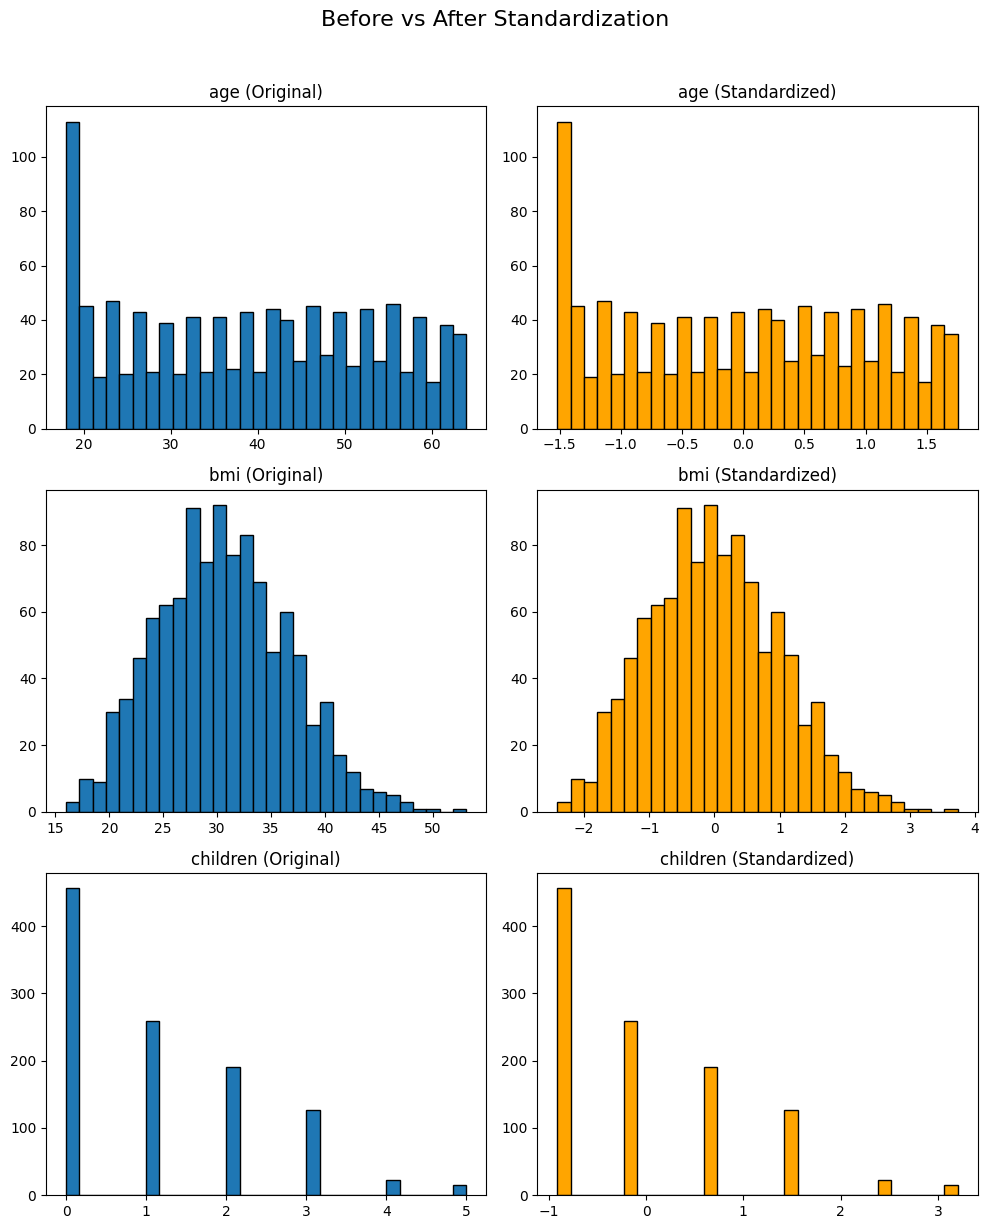

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Pick numerical columns
num_cols = artifacts["num_cols"]

# Before standardization
fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 4 * len(num_cols)))
fig.suptitle("Before vs After Standardization", fontsize=16, y=1.02)

for i, col in enumerate(num_cols):
    # Original distribution
    axes[i, 0].hist(X_train[col], bins=30, edgecolor="black")
    axes[i, 0].set_title(f"{col} (Original)")

    # Standardized distribution
    scaled_col = StandardScaler().fit_transform(X_train[[col]])
    axes[i, 1].hist(scaled_col, bins=30, edgecolor="black", color='orange')
    axes[i, 1].set_title(f"{col} (Standardized)")

plt.tight_layout()
plt.show()


### Standardization Impact on Models

In this project, we applied **standardization (mean=0, std=1) to all numerical features** using `StandardScaler`.  
This is important because:

- **Linear models (Linear, Ridge, Lasso, ElasticNet)** rely on feature scale for stable coefficient estimation.
- **SVM and KNN** also depend heavily on standardized features.
- **Tree-based models (Random Forest, Gradient Boosting, XGBoost)** do not require standardization because they split based on thresholds, but including it keeps the pipeline consistent when using multiple models.

#### Key Takeaways
- Standardization prevents features with large magnitudes (e.g., `age=60`, `bmi=32`) from dominating the model.
- It speeds up optimization for linear and gradient-based algorithms.
- Tree-based models remain unaffected in terms of accuracy but can integrate smoothly into standardized pipelines.


In [30]:
import joblib

# Save the preprocessor (encoder + scaler) and the model
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']